# Neural Network Image Classifier (MNIST handwritten data)

#### INFORMATIONAL: in below script I am using batch_size paramater while training model that speeds-up learning process due to the fact that learning algorithm (gradient descent calculation etc) is performed after batch of training samples is processed (not after each sample is processed). Even though it speeds up trainng process it sometimes might result with decrease in model accuracy so must be used with caution.

## Import necessarry libraries for multilayer perceptron

In [227]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow.keras as keras
import tensorflow as tf

## Load MNIST data set

In [228]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Normalize input data set

In [229]:
x_train, x_test = x_train / 255.0, x_test / 255.0

### Review sample data

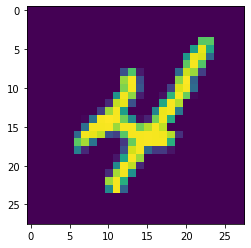

4

In [230]:
sample = 9
img = x_train[sample]
plt.imshow(img)
plt.show()
y_train[sample]

## Analyze distribution of classes

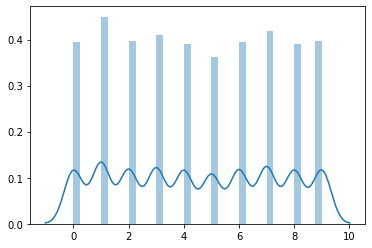

In [231]:
import seaborn as seabornInstance 

plt.tight_layout()
seabornInstance.distplot(y_train)

As we can see, data in training set is distributed evenly, so there is no need for data balancing

## Create multilayer perceptron model for data classifcation

In [232]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train multilayer perceptron model

In [233]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=1000)

Epoch 1/5
60000/60000 [==============================] - 1s 16us/sample - loss: 0.8782 - acc: 0.7549
Epoch 2/5
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3552 - acc: 0.8986
Epoch 3/5
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2853 - acc: 0.9188
Epoch 4/5
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2434 - acc: 0.9316
Epoch 5/5
60000/60000 [==============================] - 1s 14us/sample - loss: 0.2149 - acc: 0.9388


### Plot learning curve

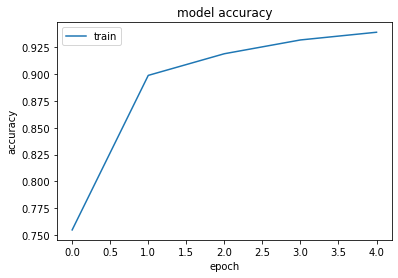

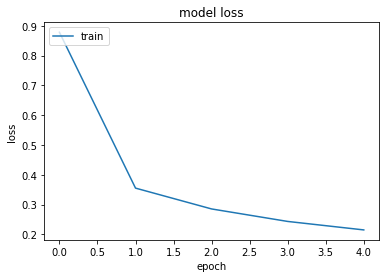

In [234]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Evaluate model accuracy on test set

In [235]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.1755 - acc: 0.9492


[0.1754661184385419, 0.9492]

### Test model predictions

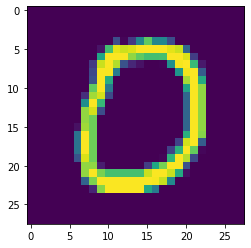

[0.98087764 0.0000053  0.00607107 0.00101805 0.00000495 0.00986123
 0.00057461 0.00003646 0.00153146 0.00001928]
Predicted number: 0
Actual number: 0


In [236]:
np.set_printoptions(suppress=True)
testPict = 10

img = x_test[testPict]
plt.imshow(img)
plt.show()

predictions = model.predict(x_test)
print(predictions[testPict])
print("Predicted number:", predictions[testPict].argmax())
print("Actual number:", y_test[testPict])

## Create convolutional neural network model for classification

### Import CNN objects

In [237]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

### Reshape input data by adding additional dimmension for convolution filters

In [238]:
train_images = np.expand_dims(x_train, axis=3)
test_images = np.expand_dims(x_test, axis=3)

### Specify CNN layer paramaters

In [239]:
num_filters = 8  # number of filters to be used in single convolutional layer
filter_size = 3  # dimmension of filter (3x3)
pool_size = 2    # pooling size for MaxPooling layer

### Create CNN model architecture

In [240]:
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


### Train the CNN model

In [241]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

history = model.fit(
  train_images,
  to_categorical(y_train),
  epochs=3,
  validation_data=(test_images, to_categorical(y_test)), batch_size=1000
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 7s 109us/step - loss: 1.3944 - accuracy: 0.6812 - val_loss: 0.6270 - val_accuracy: 0.8494
Epoch 2/3
60000/60000 [==============================] - 6s 95us/step - loss: 0.4757 - accuracy: 0.8757 - val_loss: 0.3660 - val_accuracy: 0.9004
Epoch 3/3
60000/60000 [==============================] - 8s 127us/step - loss: 0.3505 - accuracy: 0.9004 - val_loss: 0.3109 - val_accuracy: 0.9121


### Plot learning curve

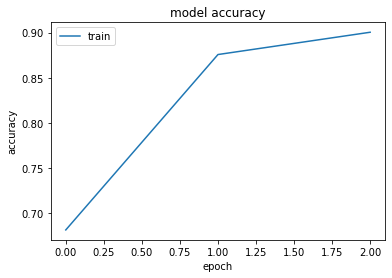

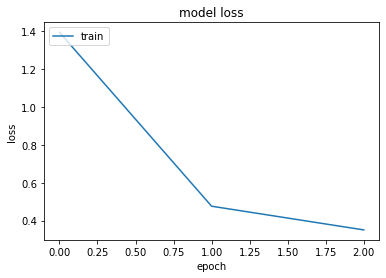

In [242]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test CNN model predictions

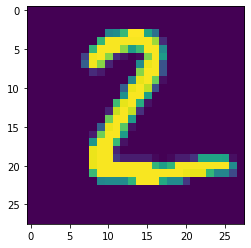

[0.0035317  0.00011286 0.97446024 0.00599946 0.00000007 0.00451863
 0.00827671 0.00000002 0.00309993 0.00000018]
Predicted number: 2
Actual number: 2


In [243]:
np.set_printoptions(suppress=True)

testPictureNo = 1;

img = x_test[testPictureNo]
plt.imshow(img)
plt.show()

predictions = model.predict(test_images)
print(predictions[testPictureNo])
print("Predicted number:", predictions[testPictureNo].argmax())
print("Actual number:", y_test[testPictureNo])